In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
tesla = yf.Ticker("TSLA")

In [9]:
tesla_data = tesla.history(period="max")

In [11]:
tesla_data.reset_index(inplace=True)

In [13]:
print("Tesla Stock Data (First 5 rows):")
print(tesla_data.head())

Tesla Stock Data (First 5 rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [65]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [87]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

In [89]:
soup = BeautifulSoup(html_data, 'html.parser')

In [91]:
tables = soup.find_all('table') 

In [93]:
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        target_table = table
        break

In [95]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [97]:
for row in target_table.find('tbody').find_all('tr'):
    col = row.find_all('td') 
    date = col[0].text
    revenue = col[1].text 

In [99]:
revenue = revenue.replace(',', '').replace('$', '')

In [101]:
tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [103]:
print(tesla_revenue.head())

         Date Revenue
0  2009-06-30      27


In [105]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_18572\2023399376.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)


In [107]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [109]:
print("\nTesla Revenue Data (Last 5 rows):")
print(tesla_revenue.tail())


Tesla Revenue Data (Last 5 rows):
         Date Revenue
0  2009-06-30      27


In [111]:
gme = yf.Ticker("GME")

In [113]:
gme_data = gme.history(period="max")

In [115]:
gme_data.reset_index(inplace=True)

In [117]:
print("\nGameStop Stock Data (First 5 rows):")
print(gme_data.head())


GameStop Stock Data (First 5 rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [119]:
url_2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response_2 = requests.get(url_2)

In [121]:
html_data_2 = response_2.content

In [123]:
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

In [125]:
gme_revenue = pd.read_html(str(soup_2.find_all('table')[0]))[0]

In [129]:
target_table = soup.find_all("tbody")[1]

In [131]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [133]:
for row in target_table.find_all('tr'):
    col = row.find_all('td')
    date = col[0].text 
    revenue = col[1].text

In [135]:
revenue = revenue.replace(',', '').replace('$', '')

In [137]:
gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [139]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].replace('', pd.NA)
gme_revenue.dropna(inplace=True)

In [141]:
print(gme_revenue.head())

         Date Revenue
0  2009-06-30      27


In [143]:
print(gme_revenue.tail())


         Date Revenue
0  2009-06-30      27


In [145]:
import matplotlib.pyplot as plt

In [147]:
def make_graph(stock_data, title):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()

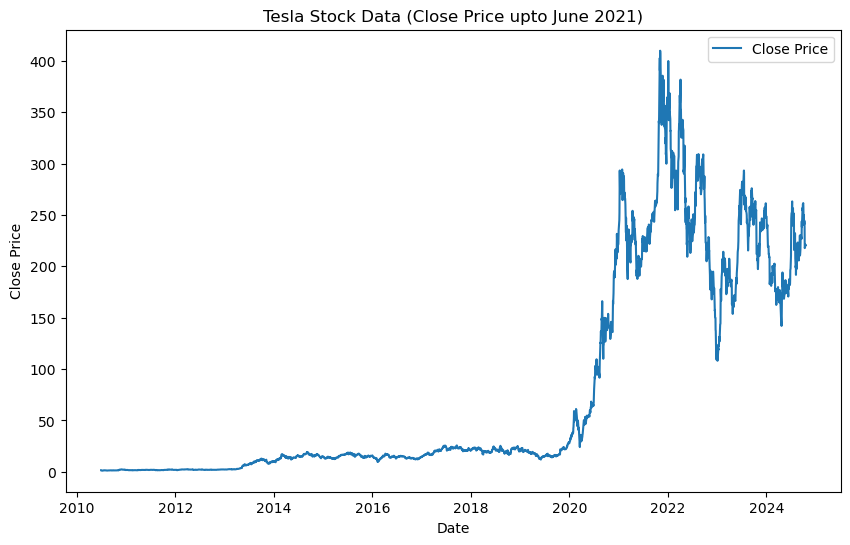

In [149]:
make_graph(tesla_data, "Tesla Stock Data (Close Price upto June 2021)")